## Import Libraries

In [153]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [154]:
# Load data
df = pd.read_excel('Customer_Churn_Data.xlsx', sheet_name='Data for DSBA')

In [155]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11260 entries, 0 to 11259
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   AccountID                11260 non-null  int64  
 1   Churn                    11260 non-null  int64  
 2   Tenure                   11158 non-null  float64
 3   City_Tier                11148 non-null  float64
 4   CC_Contacted_LY          11158 non-null  float64
 5   Payment                  11151 non-null  object 
 6   Gender                   11152 non-null  object 
 7   Service_Score            11162 non-null  float64
 8   Account_user_count       11148 non-null  float64
 9   account_segment          11163 non-null  object 
 10  CC_Agent_Score           11144 non-null  float64
 11  Marital_Status           11048 non-null  object 
 12  rev_per_month            11158 non-null  float64
 13  Complain_ly              10903 non-null  float64
 14  rev_growth_yoy        

In [156]:
df.describe()

,AccountID,Churn,Tenure,City_Tier,CC_Contacted_LY,Service_Score,Account_user_count,CC_Agent_Score,rev_per_month,Complain_ly,rev_growth_yoy,Day_Since_CC_connect,cashback
count,11260.00000,11260.000000,11158.000000,11148.000000,11158.000000,11162.000000,11148.000000,11144.000000,11158.000000,10903.000000,11257.000000,10902.000000,10787.000000
mean,25629.50000,0.168384,10.910468,1.653929,17.867091,2.902526,3.582885,3.066493,5.969708,0.285334,16.193391,4.633187,196.236370
std,3250.62635,0.374223,12.861364,0.915015,8.853269,0.725584,1.187175,1.379772,11.637306,0.451594,3.757721,3.697637,178.660514
min,20000.00000,0.000000,0.000000,1.000000,4.000000,0.000000,0.000000,1.000000,0.000000,0.000000,4.000000,0.000000,0.000000
25%,22814.75000,0.000000,2.000000,1.000000,11.000000,2.000000,3.000000,2.000000,3.000000,0.000000,13.000000,2.000000,147.210000
50%,25629.50000,0.000000,8.000000,1.000000,16.000000,3.000000,4.000000,3.000000,4.000000,0.000000,15.000000,3.000000,165.250000
75%,28444.25000,0.000000,16.000000,3.000000,23.000000,3.000000,4.000000,4.000000,7.000000,1.000000,19.000000,8.000000,200.010000
max,31259.00000,1.000000,99.000000,3.000000,132.000000,5.000000,6.000000,5.000000,140.000000,1.000000,28.000000,47.000000,1997.000000


## A. Univariate Analysis

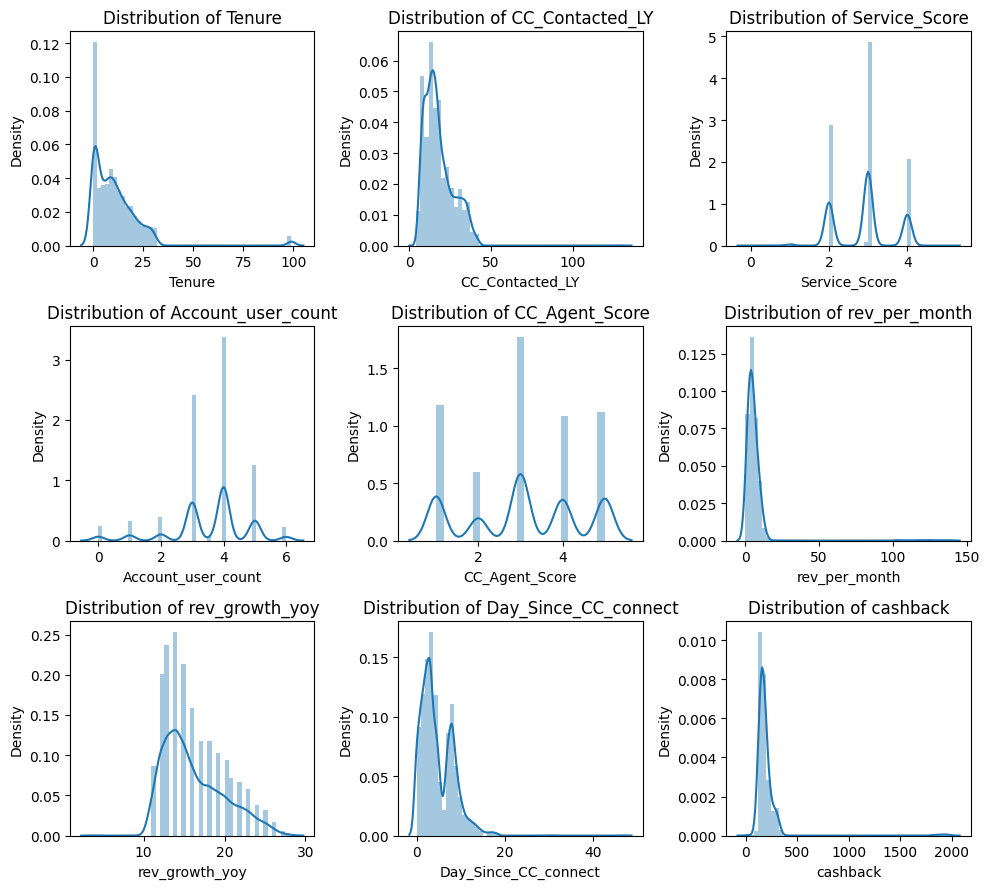

In [170]:
# Continuous Variables
continuous_vars = ['Tenure', 'CC_Contacted_LY', 'Service_Score', 'Account_user_count', 
                   'CC_Agent_Score', 'rev_per_month', 'rev_growth_yoy', 'Day_Since_CC_connect', 'cashback']

# Number of rows/columns
n_cols = 3
n_rows = len(continuous_vars) // n_cols + len(continuous_vars) % n_cols

plt.figure(figsize=(10, n_rows * 3))

for i, var in enumerate(continuous_vars):
    plt.subplot(n_rows, n_cols, i+1)
    sns.distplot(df[var], hist=True)
    plt.title('Distribution of '+ var)

plt.tight_layout()
plt.show()

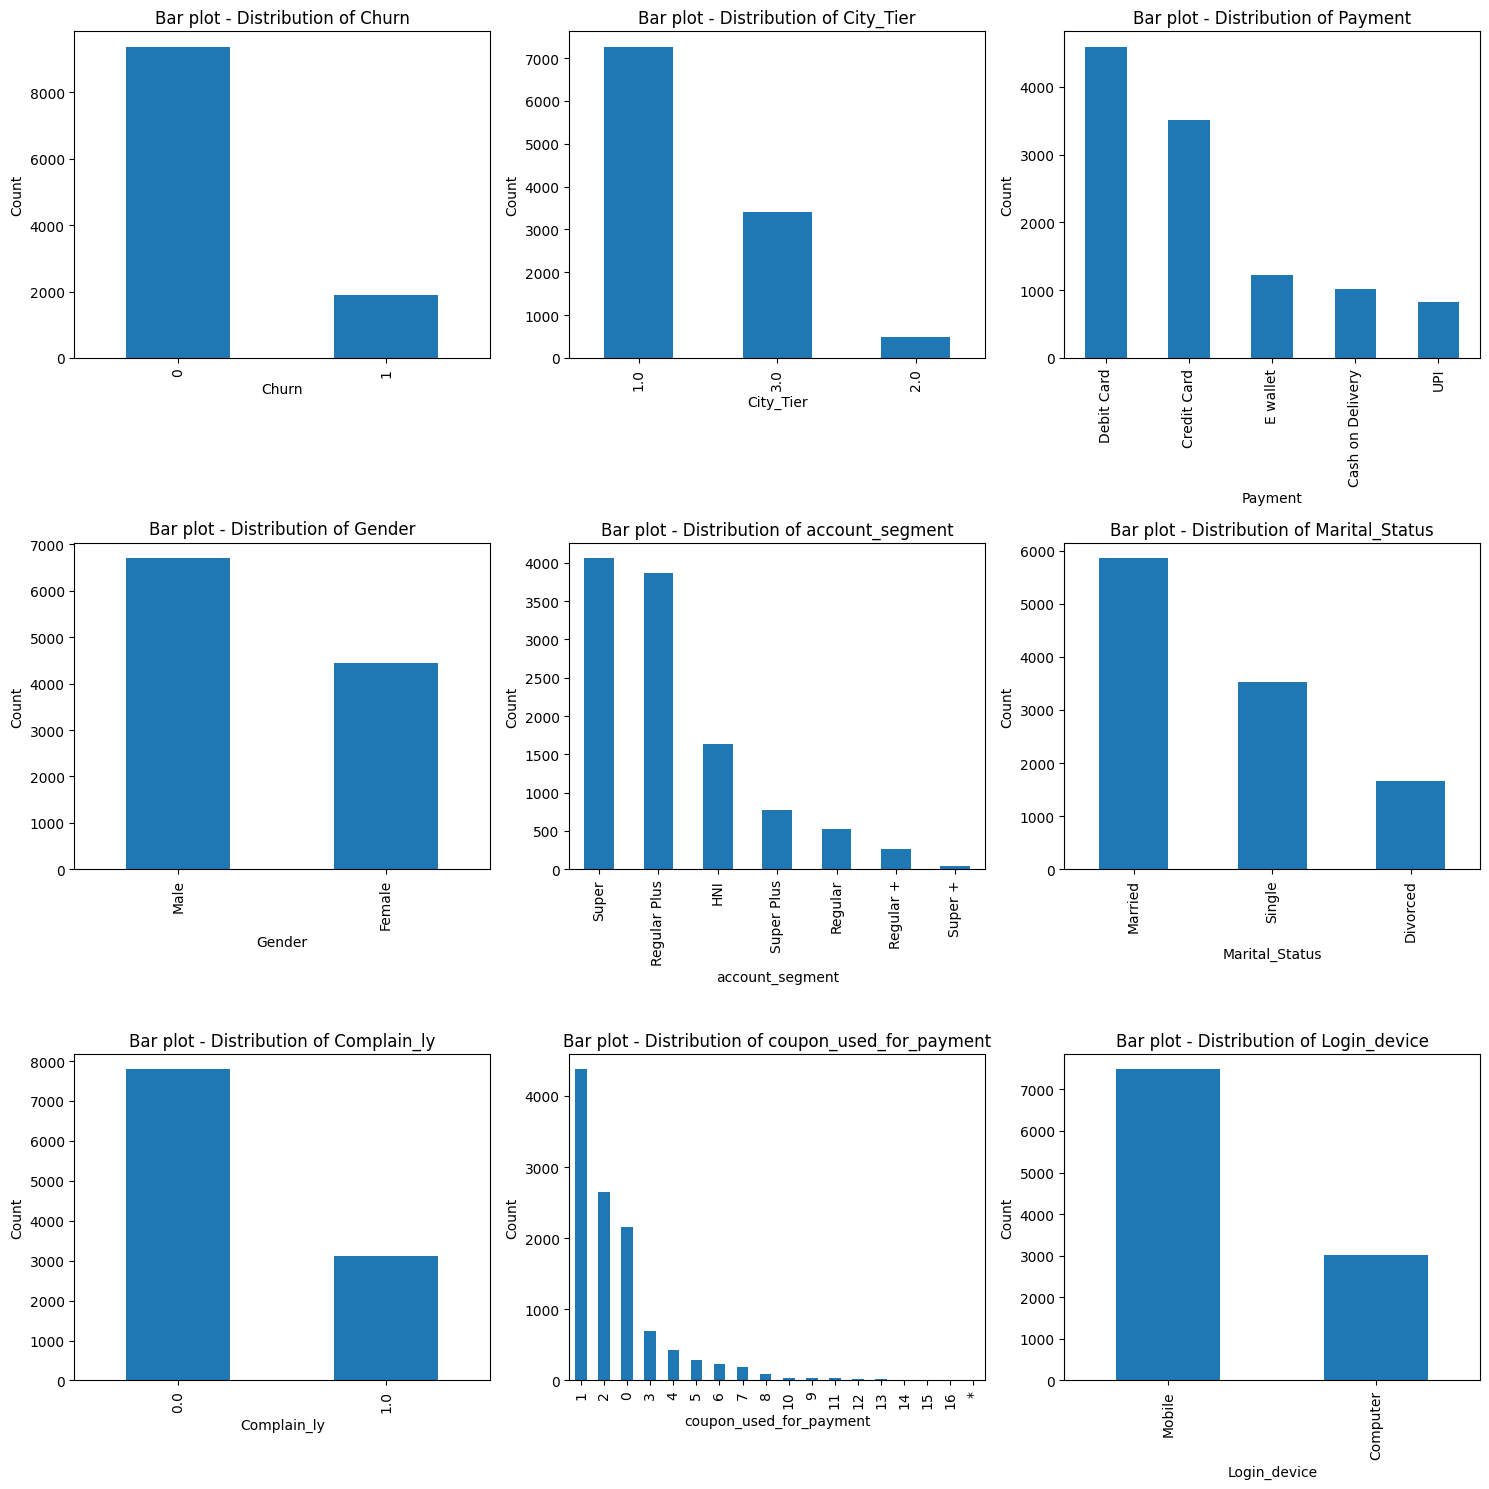

In [158]:
# Categorical Variables
categorical_vars = ['Churn', 'City_Tier', 'Payment', 'Gender', 'account_segment', 'Marital_Status', 'Complain_ly', 
                    'coupon_used_for_payment', 'Login_device']


# Number of rows/columns
n_cols = 3
n_rows = len(categorical_vars) // n_cols + len(categorical_vars) % n_cols

plt.figure(figsize=(15, n_rows*5))

for i, var in enumerate(categorical_vars):
    plt.subplot(n_rows, n_cols, i+1)
    df[var].value_counts().plot(kind='bar')
    plt.title('Bar plot - Distribution of '+ var)
    plt.xlabel(var)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

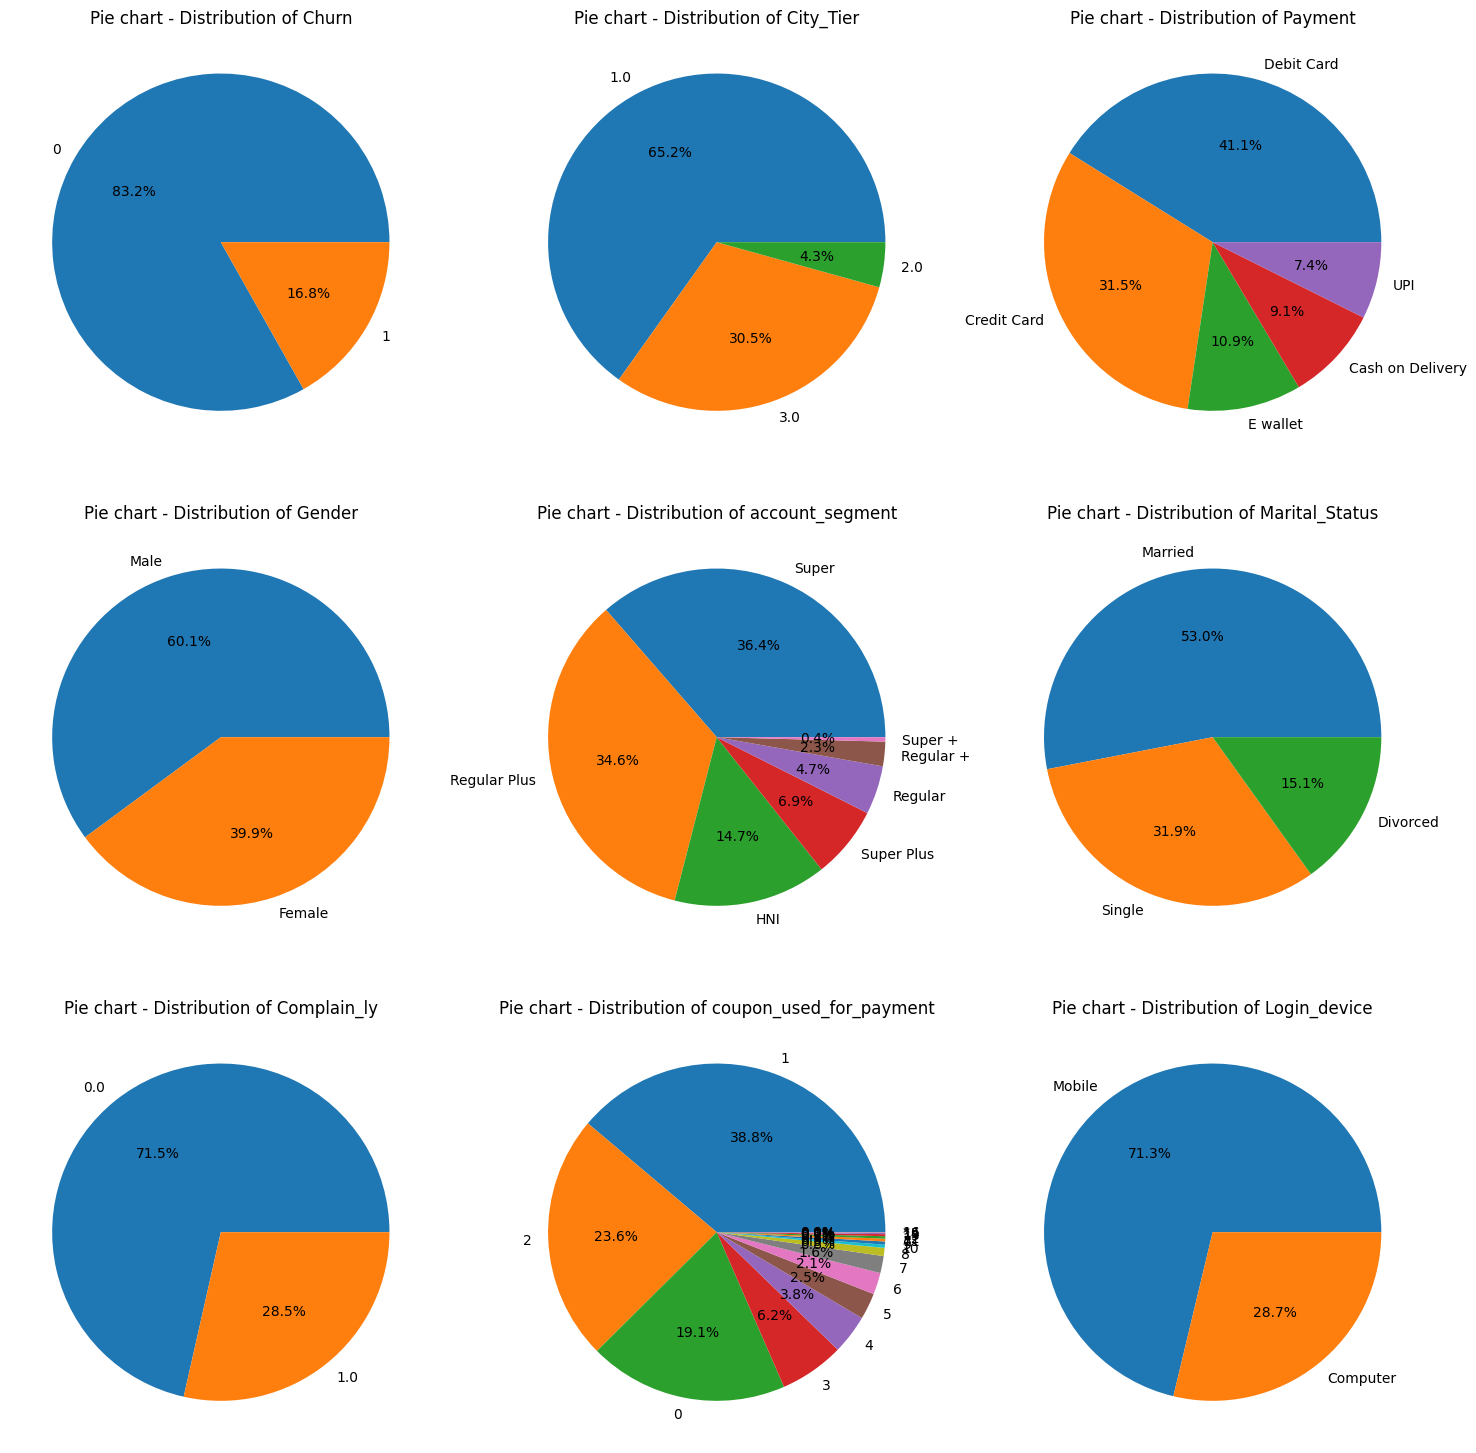

In [159]:
# Number of rows/columns
n_cols = 3
n_rows = len(categorical_vars) // n_cols + len(categorical_vars) % n_cols

plt.figure(figsize=(15, n_rows*5))

for i, var in enumerate(categorical_vars):
    plt.subplot(n_rows, n_cols, i+1)
    df[var].value_counts().plot(kind='pie', autopct='%1.1f%%')
    plt.title('Pie chart - Distribution of '+ var)
    plt.ylabel('')  # This removes the label on the y-axis

plt.tight_layout()
plt.show()

## B. Bivariate Analysis

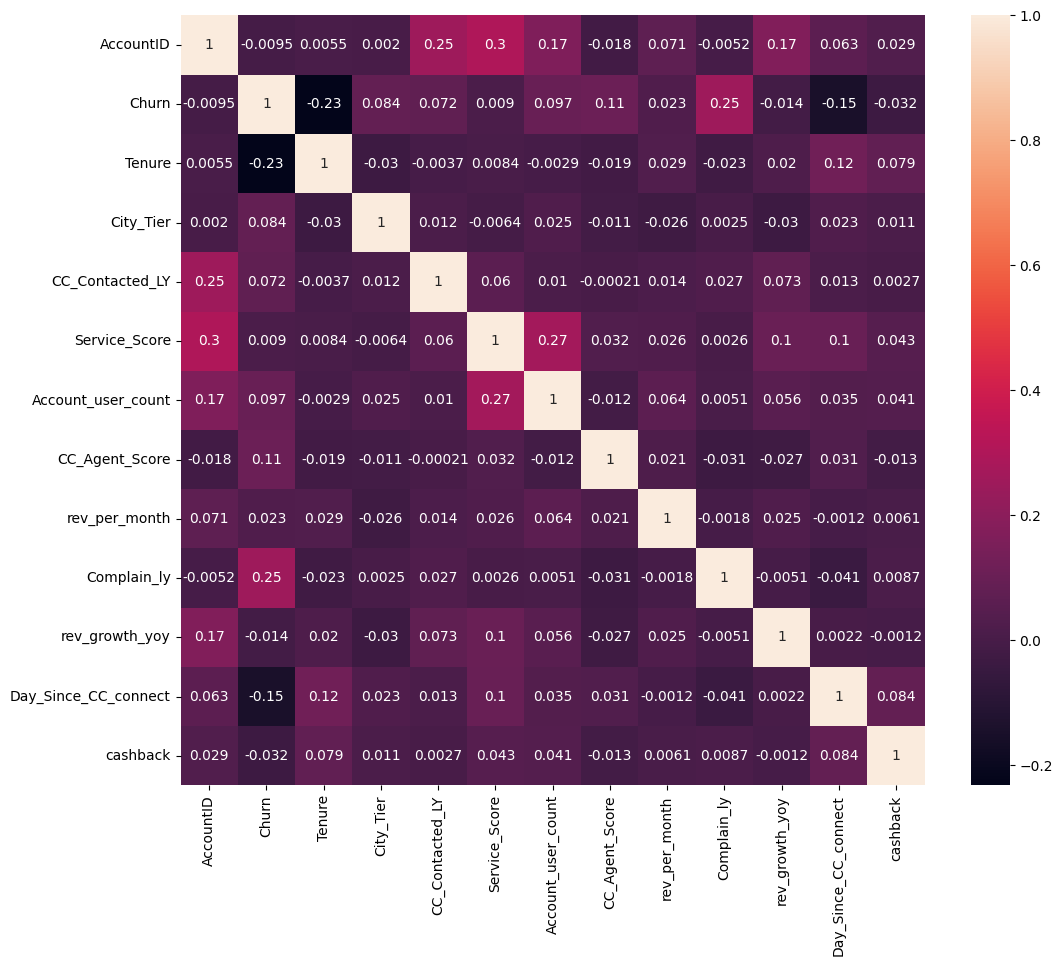

In [160]:
# Correlation Matrix for only numeric variables
numeric_vars = df.select_dtypes(include=[np.number])
corr = numeric_vars.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True)
plt.show()

### Some Interpretation from Correlation Heatmap

1. **AccountID and CC_Contacted_LY**: There is a moderate positive correlation of 0.25, suggesting that as the AccountID increases, there's a tendency for the number of times the account has contacted customer care in the last year (CC_Contacted_LY) to also increase.

2. **AccountID and Service_Score**: There's a moderate positive correlation of 0.30. This suggests that higher AccountID numbers tend to be associated with higher service satisfaction scores.

3. **Churn and Tenure**: There's a negative correlation of -0.23, suggesting that as tenure increases, churn tends to decrease. This is intuitive, as customers who have been with the company for longer are less likely to churn.

4. **Churn and Complain_ly**: There is a moderate positive correlation of 0.25. This means that the accounts that churned had a higher tendency of raising complaints in the last year.

5. **Service_Score and Account_user_count**: There's a moderate positive correlation of 0.27, suggesting that accounts with more users tend to have higher service satisfaction scores.

6. **Day_Since_CC_connect and Tenure**: There's a moderate positive correlation of 0.12, indicating that longer-tenured customers tend to have a longer time since they last connected with customer care.

7. **Day_Since_CC_connect and Churn**: There's a negative correlation of -0.15, indicating that the longer it has been since a customer last contacted customer care, the less likely they are to churn.

## Removal of Unwanted Variables

In [161]:
# Here, you need to decide which variables are not useful based on your business understanding.
# For example, if 'AccountID' is just an identifier, we can drop it
df.drop(['AccountID'], axis=1, inplace=True)

## Missing Value Treatment

In [162]:
# For simplicity, fill with mean for continuous variables and mode for categorical variables
for var in continuous_vars:
    df[var].fillna(df[var].mean(), inplace=True)

for var in categorical_vars:
    df[var].fillna(df[var].mode()[0], inplace=True)

## Outlier Treatment

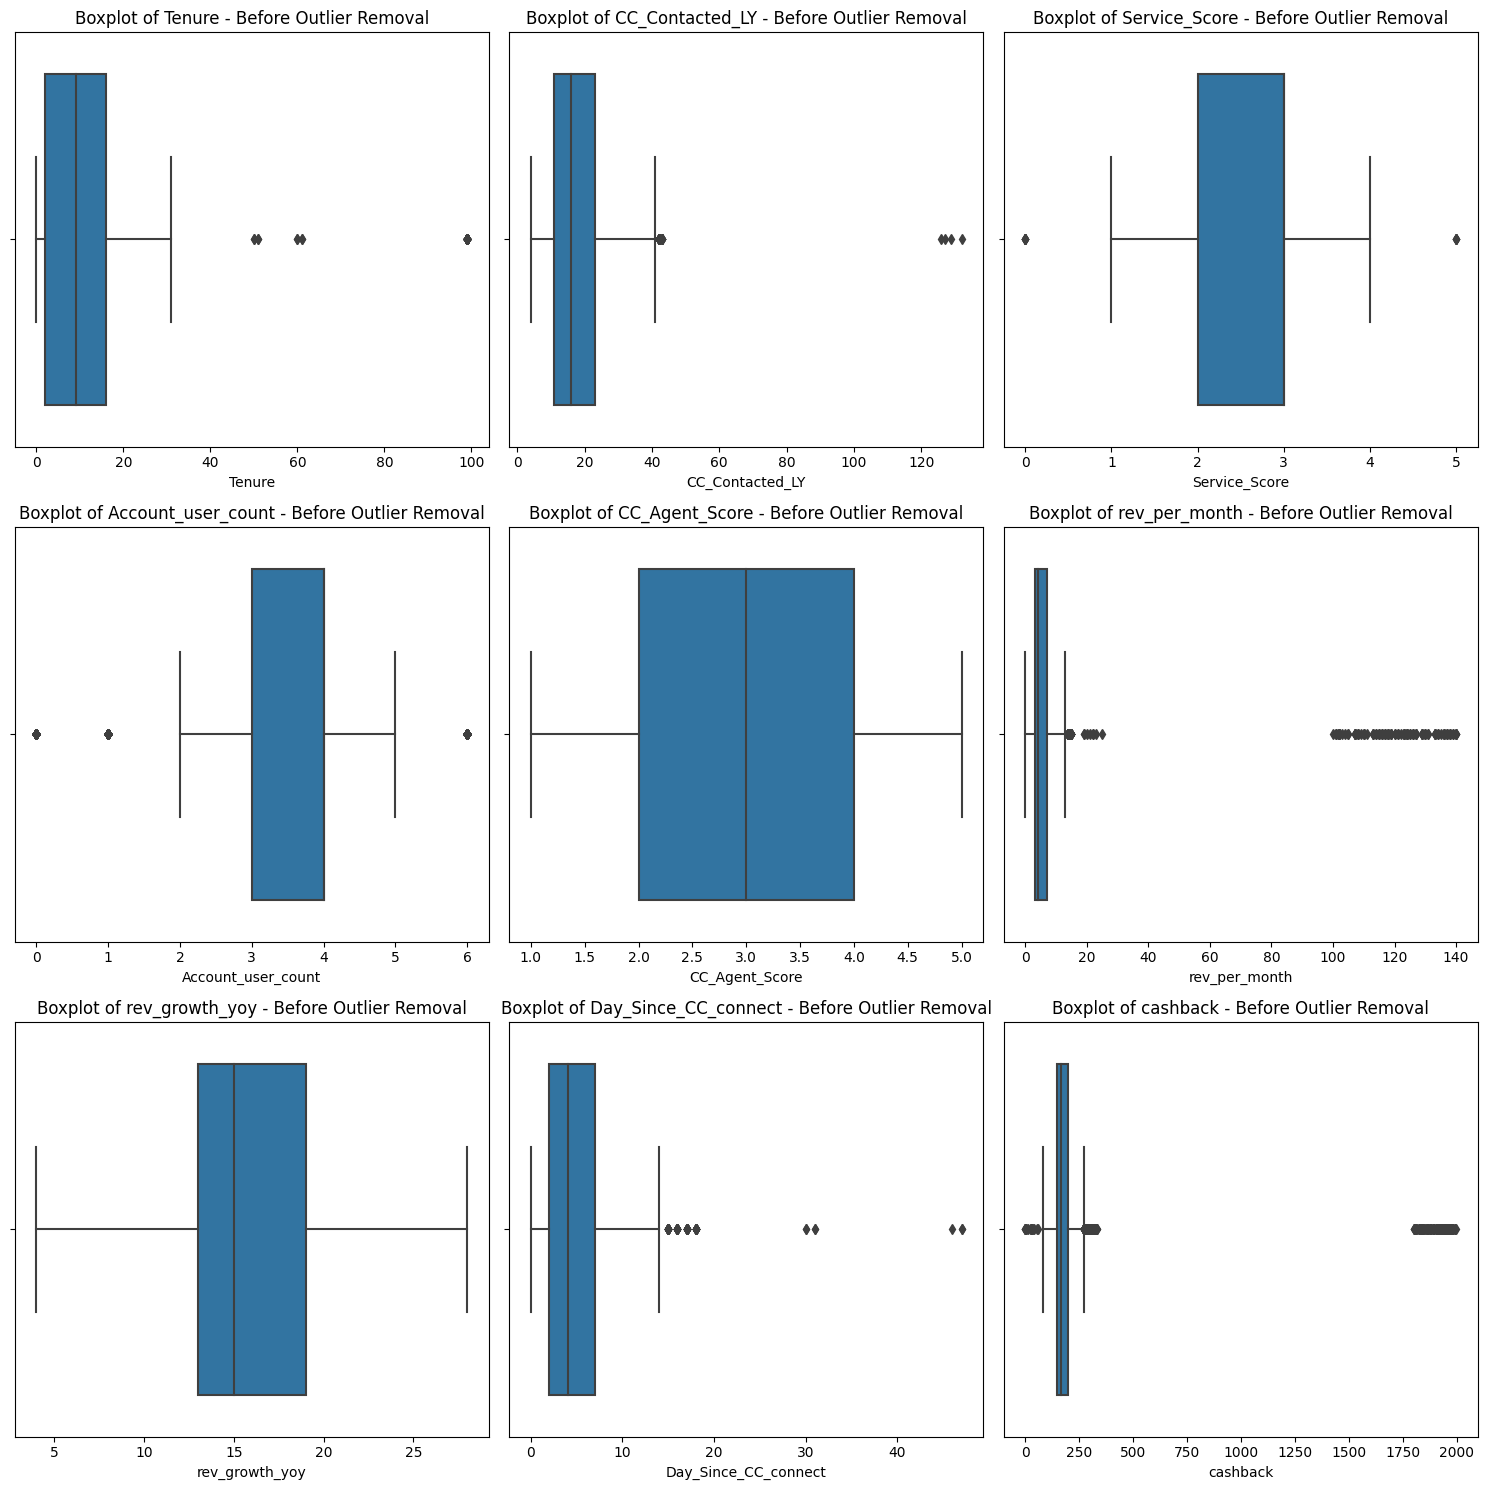

In [163]:
# List of continuous variables in dataframe
continuous_vars = ['Tenure', 'CC_Contacted_LY', 'Service_Score', 'Account_user_count', 
                   'CC_Agent_Score', 'rev_per_month', 'rev_growth_yoy', 'Day_Since_CC_connect', 'cashback']


# Number of rows/columns
n_cols = 3
n_rows = len(continuous_vars) // n_cols + len(continuous_vars) % n_cols

plt.figure(figsize=(15, n_rows*5))

for i, var in enumerate(continuous_vars):
    plt.subplot(n_rows, n_cols, i+1)
    sns.boxplot(x=df[var])
    plt.title('Boxplot of ' + var + ' - Before Outlier Removal')

plt.tight_layout()
plt.show()

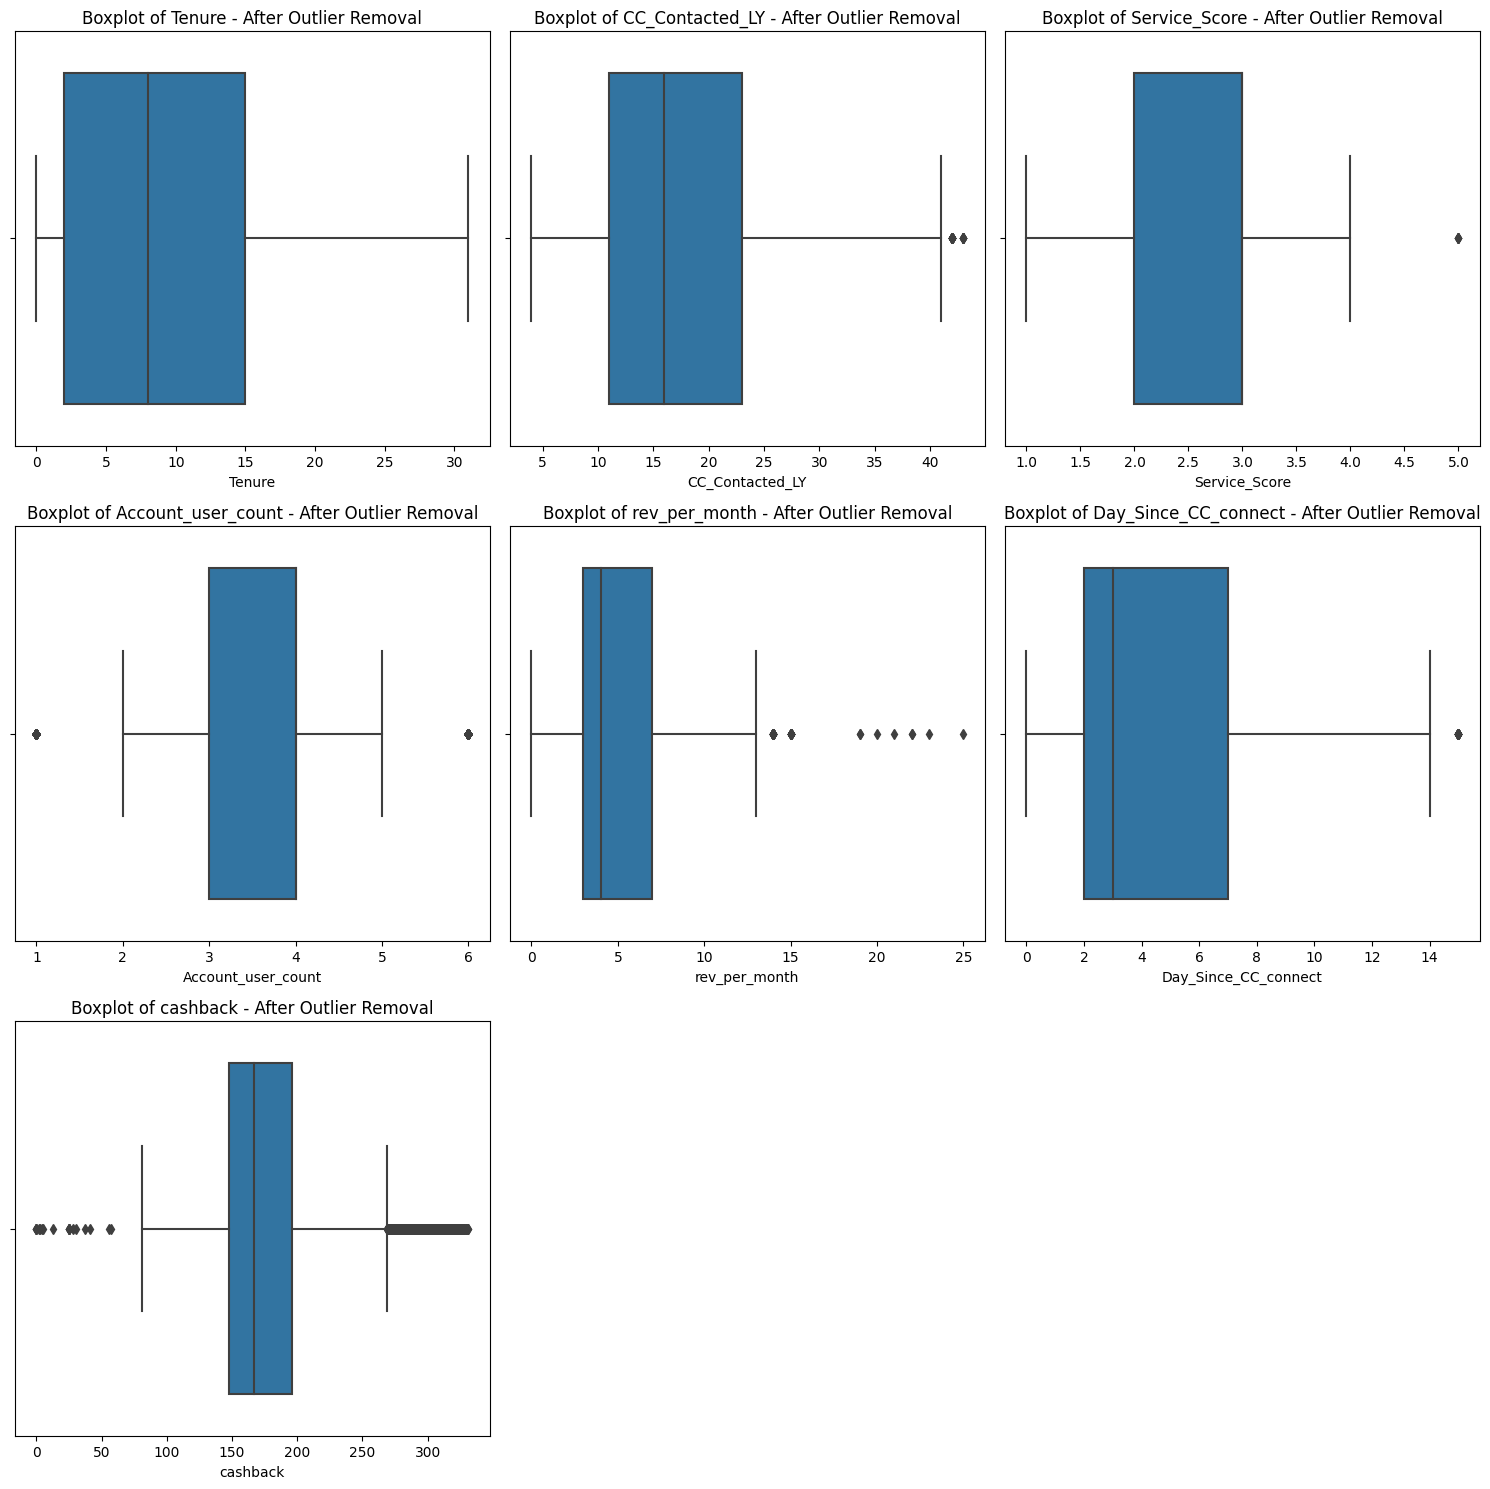

In [164]:
# List of continuous variables in dataframe having outliners
continuous_vars_removal = ['Tenure', 'CC_Contacted_LY', 'Service_Score', 'Account_user_count', 
                   'rev_per_month', 'Day_Since_CC_connect', 'cashback']

# Number of rows/columns
n_cols = 3
n_rows = len(continuous_vars_removal) // n_cols + len(continuous_vars_removal) % n_cols

plt.figure(figsize=(15, n_rows*5))

for i, var in enumerate(continuous_vars_removal):
    
    # Remove outliers using Z-score method, considering values with Z > 3 as outliers
    z_scores = np.abs(stats.zscore(df[var]))
    df_no_outliers = df[(z_scores <= 3) | np.isnan(z_scores)]

    # After outlier removal
    plt.subplot(n_rows, n_cols, i+1)
    sns.boxplot(x=df_no_outliers[var])
    plt.title('Boxplot of ' + var + ' - After Outlier Removal')

plt.tight_layout()
plt.show()

## Variable Transformation

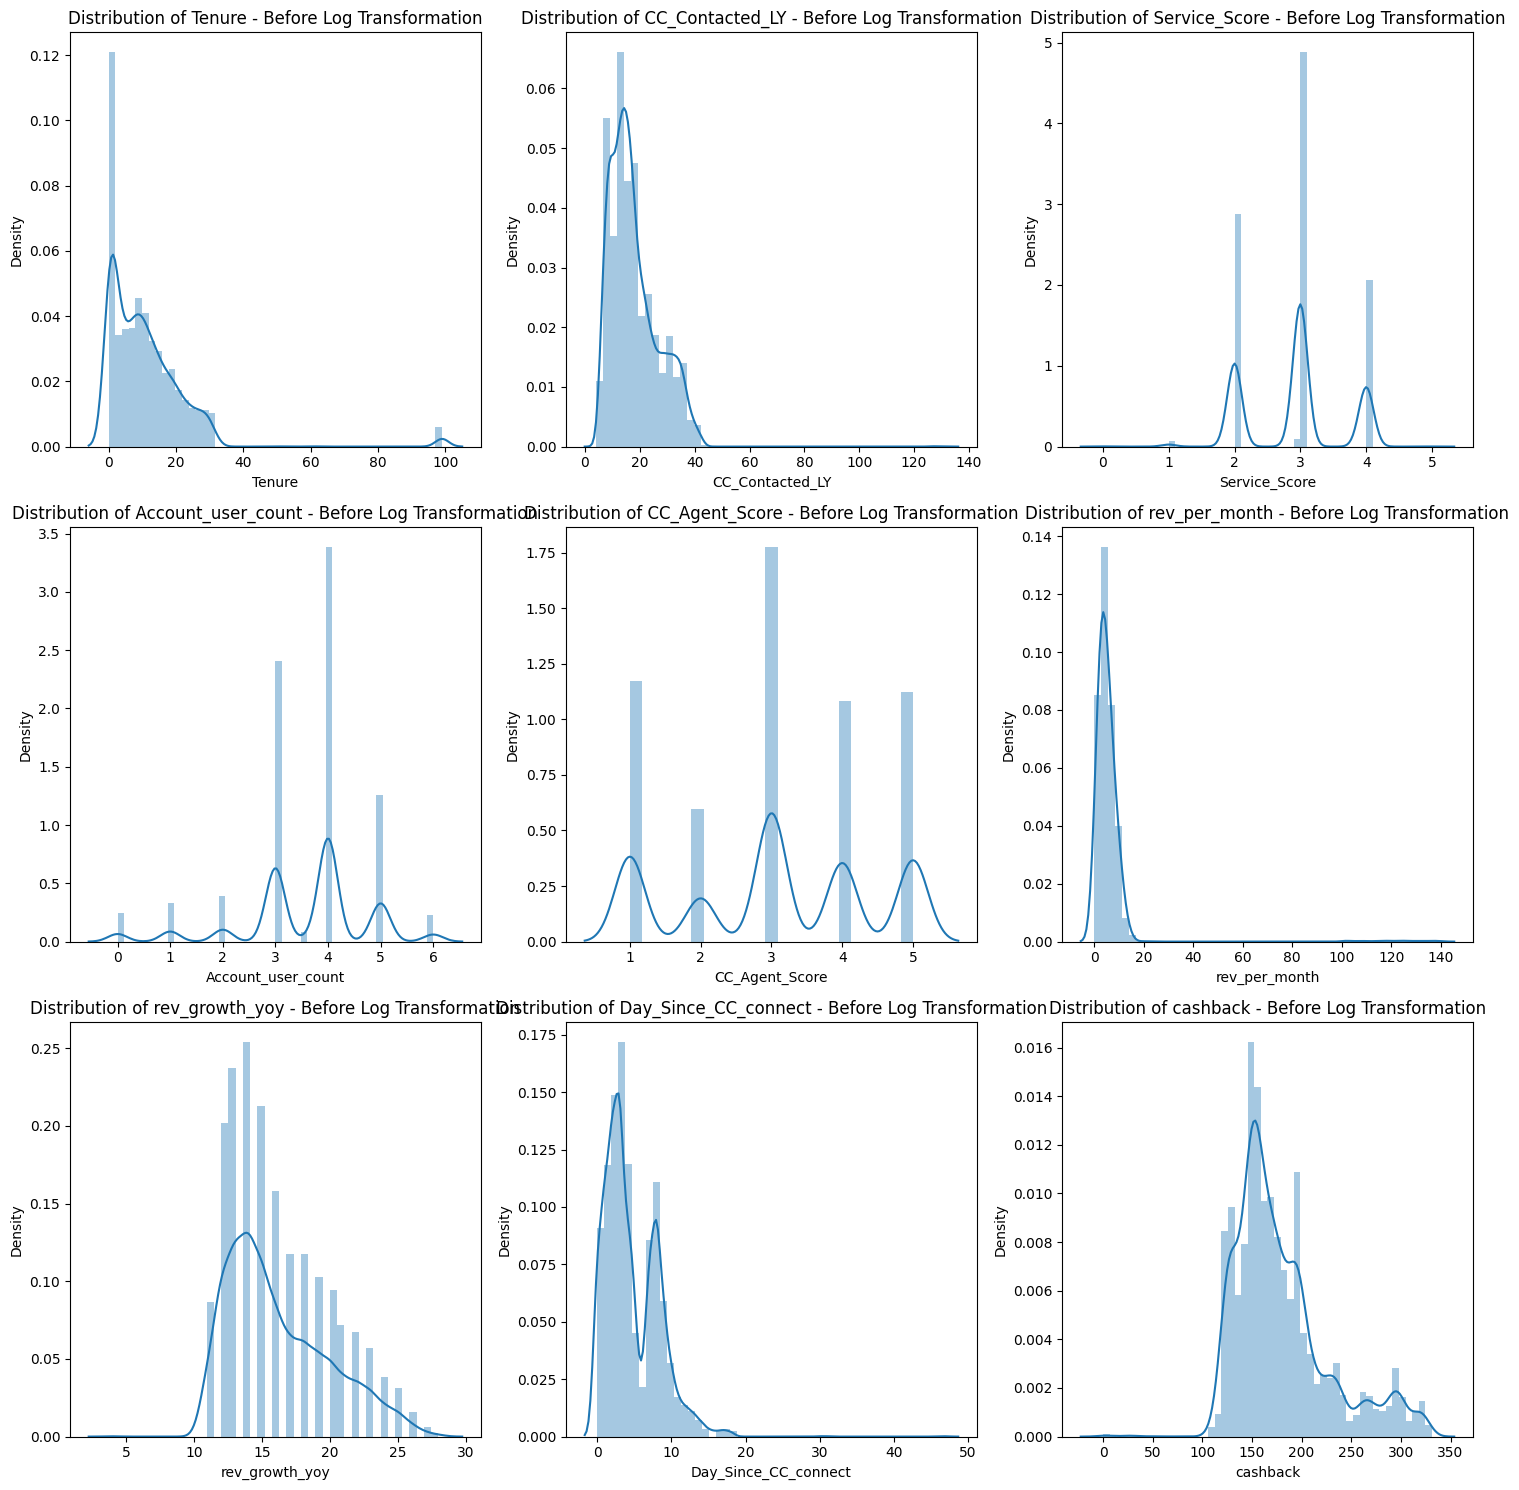

In [165]:
# Number of rows/columns
n_cols = 3
n_rows = len(continuous_vars) // n_cols + len(continuous_vars) % n_cols

plt.figure(figsize=(15, n_rows*5))

for i, var in enumerate(continuous_vars):
    # Before transformation
    plt.subplot(n_rows, n_cols, i+1)
    sns.distplot(df_no_outliers[var].dropna())
    plt.title('Distribution of ' + var + ' - Before Log Transformation')

plt.tight_layout()
plt.show()

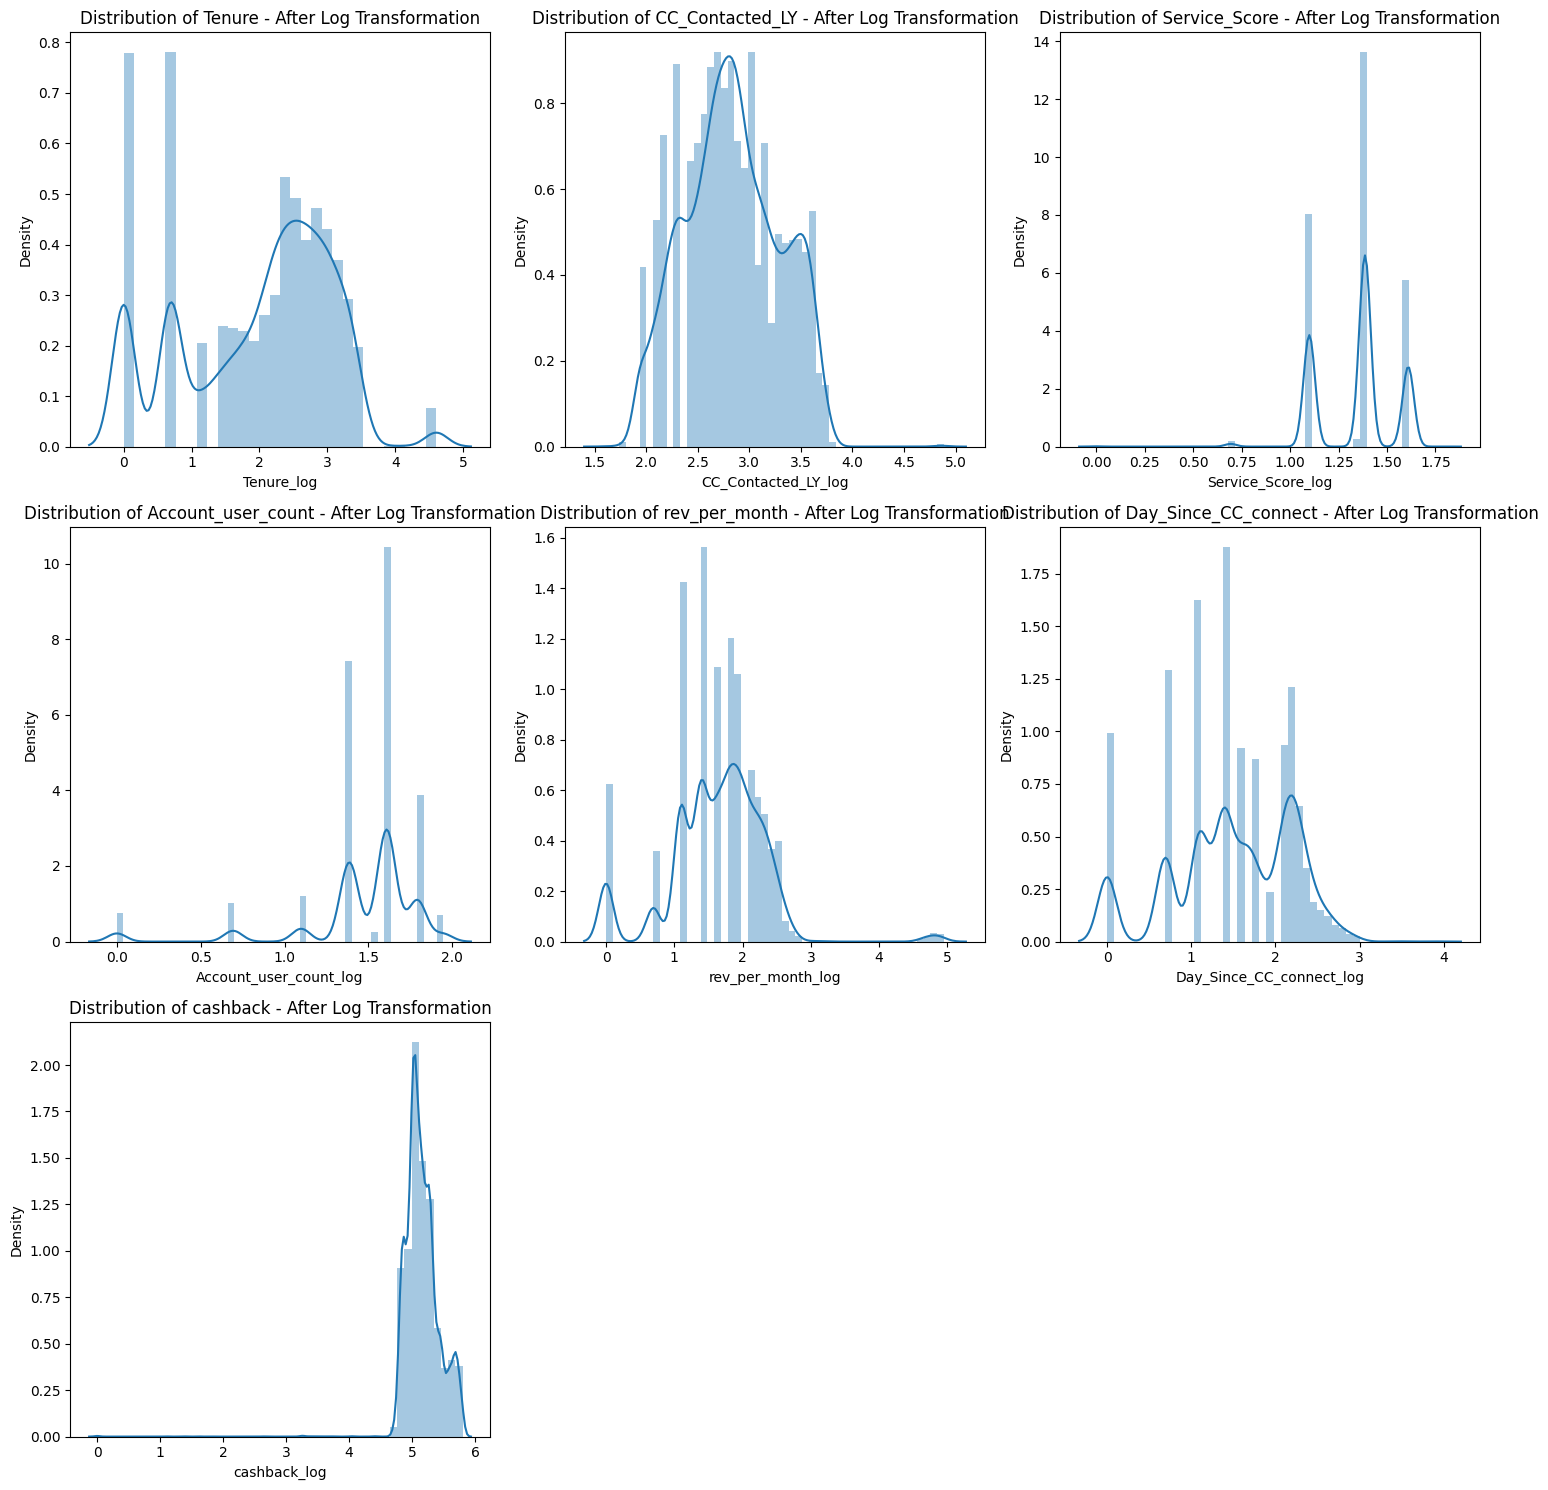

In [166]:
# Number of rows/columns
n_cols = 3
n_rows = len(continuous_vars_removal) // n_cols + len(continuous_vars_removal) % n_cols

plt.figure(figsize=(15, n_rows*5))

for i, var in enumerate(continuous_vars_removal):
    # Apply log transformation to handle skewness, adding 1 to avoid division by zero errors
    df_no_outliers[var + '_log'] = np.log1p(df_no_outliers[var])

    # After transformation
    plt.subplot(n_rows, n_cols, i+1)
    sns.distplot(df_no_outliers[var + '_log'].dropna())
    plt.title('Distribution of ' + var + ' - After Log Transformation')

plt.tight_layout()
plt.show()